In [2]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [3]:
import glob
import tensorflow as tf
import numpy as np
import pickle

In [4]:
with open('dataset_tl_small.pickle', 'rb') as f:
    (X_train_3, Y_train_3) = pickle.load(f)
print("Train shape: ")
print(X_train_3.shape)
print(Y_train_3.shape)
Class_names = ["RED","UNKNOWN", "GREEN"]

Train shape: 
(3, 600, 800, 3)
(3,)


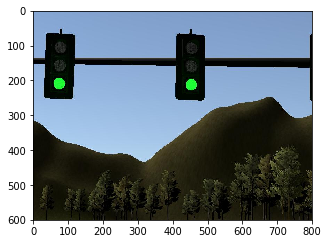

In [92]:
with tf.Session() as sess:
    image = tf.image.random_flip_left_right(X_train_3[1]).eval()
    #image = tf.image.random_brightness(X_train_3[0],0.1).eval()
    #image = tf.image.random_hue(X_train_3[0],0.1).eval()
    
   
    newimg2 = cv2.cvtColor(image, cv2.COLOR_RGB2BGR);
    plt.figure(figsize=(5,5))
    plt.imshow(newimg2)
    plt.show()

In [30]:
sess=tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.25)))
saver=tf.train.import_meta_graph('lenet.meta')
saver.restore(sess, tf.train.latest_checkpoint('./'))

graph = tf.get_default_graph()
x = graph.get_tensor_by_name("input_image:0")
#y = graph.get_tensor_by_name("correct_class:0")
keep_prob = graph.get_tensor_by_name("keep_prob:0")
output_value = graph.get_tensor_by_name("output:0")
#cross_entropy = graph.get_tensor_by_name("cross_entropy:0")
#feed_dict = {input_image_graph: X_train_3[0:1], keep_prob_graph: 1.0}


INFO:tensorflow:Restoring parameters from ./lenet


KeyError: "The name 'input_image:0' refers to a Tensor which does not exist. The operation, 'input_image', does not exist in the graph."

In [4]:
incorrect = 0
for i in range(X_train_3.shape[0]):
    predictions = sess.run(output_value, feed_dict = {x: X_train_3[0:1], keep_prob: 1.0})
    if(predictions[0] != Y_train_3[i]):            
        incorrect += 1
        print("Real = ", Class_names[int(Y_train_3[i])] , "Predicted = ", Class_names[predictions[0]])
        #newimg2 = cv2.cvtColor(X_train_3[i], cv2.COLOR_RGB2BGR);
        #plt.figure(figsize=(5,5))
        #plt.imshow(newimg2)
        #plt.show()
        
right_percent = 1.0 - incorrect / Y_train_3.shape[0]
print(right_percent)

Real =  UNKNOWN Predicted =  RED
Real =  GREEN Predicted =  RED
0.33333333333333337
